# featurePruner

## 1. Introduction & import package:

featurePruner is a python package that uses LightGBM models to better analyse your data and determine which variables are the most predictive of your response variables. featurePruner uses a collection of best practives involving gradient boosted model & feature analysis. All the functionality is encoded in the `pruner` function. 

In [1]:
from featurePruner.pruner import pruner

## 2. Downloading data from Kaggle competition: <i>House Prices - Advanced Regression Techniques <i> https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

### a. First install kaggle api using below command to get the data. Also ensure you get a API token file from your kaggle account & place it in C:/Users/Username/.kaggle folder . You need this to use the kaggle package to get competition data directly :

In [ ]:
%%capture
!pip install kaggle

### b. Download data from kaggle competition of your choice & extract it: 

In [3]:
!kaggle competitions download -c house-prices-advanced-regression-techniques -p data


  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 4.35MB/s]


In [4]:
import os
from zipfile import ZipFile

filename=os.listdir("data/")[0]
with ZipFile("data/"+filename, 'r') as zip:
    zip.printdir()
    zip.extractall("data/")


File Name                                             Modified             Size
data_description.txt                           2019-12-15 21:33:36        13370
sample_submission.csv                          2019-12-15 21:33:36        31939
test.csv                                       2019-12-15 21:33:36       451405
train.csv                                      2019-12-15 21:33:36       460676


## 3. Import data as pandas dataframe & clean the data:

In [5]:
import pandas as pd

df=pd.read_csv("data/train.csv")
df.head()

# Missing data is replaced with "UNKNOWN" values. Numeric columns in this data dont have missing values
for col in df.columns:
    if df[col].dtype=="object":
        df[col].fillna("UNKNOWN",inplace=True )
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,UNKNOWN,Reg,Lvl,AllPub,...,0,UNKNOWN,UNKNOWN,UNKNOWN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,UNKNOWN,Reg,Lvl,AllPub,...,0,UNKNOWN,UNKNOWN,UNKNOWN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,UNKNOWN,IR1,Lvl,AllPub,...,0,UNKNOWN,UNKNOWN,UNKNOWN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,UNKNOWN,IR1,Lvl,AllPub,...,0,UNKNOWN,UNKNOWN,UNKNOWN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,UNKNOWN,IR1,Lvl,AllPub,...,0,UNKNOWN,UNKNOWN,UNKNOWN,0,12,2008,WD,Normal,250000


In [6]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

There is a mix of numeric (int64, float64) and chatacter (object) variables which is not a problem as `featurePruner` and LightGBM will take care of it.
<br>
Below we add a new 'weight' column to show that `featurePruner` can handle datasets with observation weights. The weight is just a random uniform number between 0.9 & 1.1.

<AxesSubplot:>

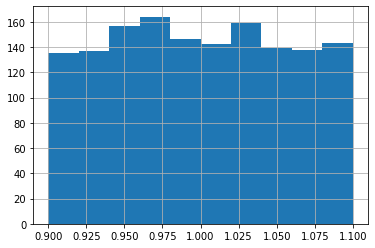

In [7]:
import numpy as np
df["weight"] = np.random.uniform(low=0.9, high=1.1, size=len(df))
df["weight"].hist()

## 4. Package features:

We will now show the functionality of `featurePruner` API.
Things to note in this section:
* We use default arguments for everything except for `objective`, `auto_tune_missing_parameters` and `print_logs`
* We set `objective` to be `rmse`(which also happens to be the default value) since this is a regression problem. 
* `auto_tune_missing_parameters` will perform hyperparameter tuning. We wont specify any lightGBM parameters in this section. We set this to `True` for now.
* `print_logs` prints lots of messages to give you info on whats going on in the back end. We set this to `False` for the time being. 

In [8]:
result = pruner(df=df, target_column="SalePrice", weight_column="weight", objective="rmse",
                     auto_tune_missing_parameters=True, print_logs=False)

The result of the `pruner` function is a dictionary of 4 items. The first item, called `pruningResults` will interest the most users. This contains the importance & most predictive variables in your dataset.

In [6]:
#List all keys in the result dataFrame
_ = [print(key) for key in result.keys()]

pruningResults
prediction_correlation
cluster_by_pruning_intensity
model


In [7]:
## Looking at the 'pruningResults' key
result["pruningResults"].head(20)

,permutation_importance,gain_importance,percent_permutation_importance,percent_gain_importance,removeVariableAtIntensity1,removeVariableAtIntensity2,removeVariableAtIntensity3,removeVariableAtIntensity4,removeVariableAtIntensity5
OverallQual,7.545866e+08,2.759573e+13,0.300902,0.291610,False,False,False,False,False
GrLivArea,4.469648e+08,1.255459e+13,0.178234,0.132667,False,False,False,False,False
TotalBsmtSF,1.837575e+08,5.705064e+12,0.073276,0.060287,False,False,False,False,True
Neighborhood,1.724027e+08,4.681396e+12,0.068748,0.049469,False,False,False,False,True
BsmtFinSF1,1.226983e+08,3.103706e+12,0.048928,0.032798,False,False,False,False,True
1stFlrSF,1.151829e+08,3.048471e+12,0.045931,0.032214,False,False,False,False,True
YearBuilt,1.018120e+08,3.796907e+12,0.040599,0.040123,False,False,False,False,True
GarageCars,9.392122e+07,7.062432e+12,0.037452,0.074630,False,False,False,False,True
GarageArea,6.688904e+07,5.939347e+12,0.026673,0.062762,False,False,False,False,True
KitchenQual,7.309667e+07,2.195584e+12,0.029148,0.023201,False,False,False,True,True


`pruningResults` contains a pandas DataFrame with variables as index column & other columns have the importance information of each variable. 
* The `permutation_importance` and `gain_importance` are permutation importance and gain importance measures respectively. 
* If unfamiliar with with permutation importance, please read this from Christopher Molnar's [Interpretable Machine Learning book](https://christophm.github.io/interpretable-ml-book/feature-importance.html). 
* Gain importance is the the reduction in the loss function from that particular variable in the model. 
* Note that  gain importance is based on a training data  and permutation importance is based on a validation data. 
<br>
<br>
* The validation set in `pruner` is random by default and it is controlled by `validation_percent` argument or  `validation_column` argument . We are using the default of `validation_percent = 0.35` uses 35% of the data for validation.
<br>
<br>
* The next two columns show the permutation importance and gain importance as a percentage of the total (for advanced modellers: the denominator in the percentage of permutation importance is based on positive permutation importance only).
<br>
<br>
* The last 5 columns that start with `removeVariableAtIntensity...` are package recommendations to remove variables  at various "pruning_intensity levels". In `featurePruner` package the word "pruner" is synonymous with "drop/remove" columns. There are five pruning intensity levels (1,2,3,4 & 5) with 1 most being the least aggressive meaning least amount of variables are recommended to be removed and 5 being the level where most variables are recommended to be removed. In general, as the pruning intensity levels increases the number of variables to remove increases. In the `pruner` function you can control this level through `pruning_intensity` argument. The default is `None` which will return recommendation for all 5 levels. There is no extra computation to retuen all 5 recommendation levels, so I recommend doing this so that you get the flexibility to decide which one is most appropriate for you. Read more of my suggestions in the FAQ.md file.


## 5. Detailed look at featurePruner:


* To understand the package better, let's pass a custom set of validation indices by setting aside 
  `RoofStyle` column value=='Hip' as the validation set 
* Lets return the appraisal at pruning_intensity=3. 
* We will also let pruner run some hyperparamter optimizations with  `random_tuning_runs=10`
  and  `total_tuning_runs=40` ( i.e total optimization runs which includes the random tuning runs(of 10)) to find an optimal set of hyperparameters. 
* Finally, let's make the `pruner` function print logs by setting `print_logs=True`.



In [8]:
validation_indexes = df.RoofStyle == "Hip"
result = pruner(df=df, target_column="SalePrice", weight_column="weight", objective="rmse",
                     auto_tune_missing_parameters=True, print_logs=True, validation_column=validation_indexes, pruning_intensity=3,
                     random_tuning_runs=10, total_tuning_runs=40)

These string valued columns are being converted to categorical :
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Removing 39 variables because they are not predictive according to Primary model results. These will not have any info. 
`autofillMissingParameters` is True so we are going to perform  hyperparameter tuning for 40 runs 

Hyperparameters finalised. These are the parameters used in   Secondary model:
{'learning_rate': 0.04, 'max_depth': 8, 'num_leaves': 

Pruning complete. Result is a dictionary. TO look at results, check the check the 'results' key which has a dataframe as value with all the results. 



Setting `print_logs=True` shows a lot of information on the console. Every time a variable is dropped, a log is printed for the user.

In [9]:
pd.set_option('display.max_rows', 100)

result["pruningResults"].head(90)

,permutation_importance,gain_importance,percent_permutation_importance,percent_gain_importance,removeVariableAtIntensity3
OverallQual,1.136547e+09,1.314359e+13,0.251587,0.244955,False
GrLivArea,1.032231e+09,9.050488e+12,0.228496,0.168673,False
Neighborhood,4.040170e+08,2.995096e+12,0.089434,0.055819,False
BsmtFinSF1,2.802826e+08,2.241057e+12,0.062044,0.041766,False
1stFlrSF,2.716959e+08,2.218384e+12,0.060143,0.041344,False
KitchenQual,2.513620e+08,1.368499e+12,0.055642,0.025505,False
TotalBsmtSF,2.218461e+08,2.608922e+12,0.049108,0.048622,False
GarageArea,1.261082e+08,3.398884e+12,0.027915,0.063344,False
2ndFlrSF,1.187188e+08,1.486567e+12,0.026280,0.027705,False
LotArea,1.126147e+08,2.094062e+12,0.024928,0.039027,False


* 38 variables were dropped as they were deemed unpredictive from the Primary model results. The threshold to remove/drop variables after the Primary model is decided by the `min_gain_percent_for_pruning` paramter. Since we left this argument at the default value. So use this argument to control how many variables you want dropped.

* Next, the line starting with "Removing 38 variables..." tells us that the variable `RoofStyle` has been removed from the important variable list. Reason being our validation set was exclusively made of `RoofStyle == "Hip"` observations & permutation importance uses the validation set for calculations. So for the `RoofStyle` variable, we cannot compute the permutation importance because it has only one unique record, and thus it is removed.
<br>
<br>
* Now lets take a look at the second object `prediction_correlation`below:

In [10]:
result["prediction_correlation"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Neighborhood,OverallQual,OverallCond,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold
Id,1.000000,0.069713,0.043833,0.042119,0.011485,-0.107425,-0.006189,0.041607,-0.003528,0.008993,...,-0.015999,-0.056553,-0.039857,0.077892,-0.006163,0.066690,-0.007582,-0.083227,-0.076314,0.033421
MSSubClass,0.069713,1.000000,0.323277,0.169980,0.202041,0.049833,0.030388,0.085785,0.003092,0.126286,...,0.055674,-0.131970,-0.026614,0.071892,0.112652,-0.060961,0.079788,0.089265,0.019067,-0.157452
MSZoning,0.043833,0.323277,1.000000,0.193774,0.169501,0.118170,0.025464,0.224683,0.083011,-0.007333,...,0.196560,0.060593,0.095349,0.098620,0.145749,0.047804,-0.036748,0.106564,0.071783,0.102446
LotFrontage,0.042119,0.169980,0.193774,1.000000,0.182344,0.082936,-0.088884,0.214673,0.173585,0.043393,...,0.164489,0.050021,0.122990,0.130675,0.227656,0.049559,0.053818,0.046413,-0.093821,0.032476
LotArea,0.011485,0.202041,0.169501,0.182344,1.000000,0.153747,-0.017646,0.347005,0.235622,-0.113814,...,0.145931,0.066330,0.029028,0.354024,0.378023,0.079745,0.092685,0.022250,0.064907,0.036021
LotShape,-0.107425,0.049833,0.118170,0.082936,0.153747,1.000000,-0.018124,0.099176,0.113499,0.122818,...,0.011580,0.034684,0.094505,0.063528,0.119064,0.108067,-0.000259,-0.007283,0.029105,-0.071157
LandContour,-0.006189,0.030388,0.025464,-0.088884,-0.017646,-0.018124,1.000000,0.044197,0.027643,-0.005085,...,-0.058011,-0.013234,-0.002157,0.019692,0.006366,0.009054,0.051042,0.006712,0.061214,-0.026240
Neighborhood,0.041607,0.085785,0.224683,0.214673,0.347005,0.099176,0.044197,1.000000,0.670609,-0.164551,...,0.252997,0.525784,0.335028,0.538105,0.512315,0.223043,0.091913,0.000037,0.087378,0.136554
OverallQual,-0.003528,0.003092,0.083011,0.173585,0.235622,0.113499,0.027643,0.670609,1.000000,-0.149503,...,0.332307,0.686760,0.408971,0.624724,0.588298,0.279719,0.198168,-0.055451,0.125195,-0.021029
OverallCond,0.008993,0.126286,-0.007333,0.043393,-0.113814,0.122818,-0.005085,-0.164551,-0.149503,1.000000,...,-0.103819,-0.155502,-0.086653,-0.187539,-0.118829,-0.043589,-0.135907,-0.016376,-0.069693,0.002203


* `prediction_correlation` is a correlation matrix for all the variables that `pruner` was able to run permutation importance for. 
* More specifically, it's a correlation matrix of the difference in predictions between the model's original predictions and the model's predictions when each variable is permuted one at a time. 
* These results are ultimately used as input by the package to come up with variable recommendations at various pruning levels.
<br>
<br>
`featurePruner` also has a couple of utility functions to look at the prediction-space correlation between variables:
* `correlation_heatmap`  allows us to take the correlation matrix and plot a heatmap as shown below:

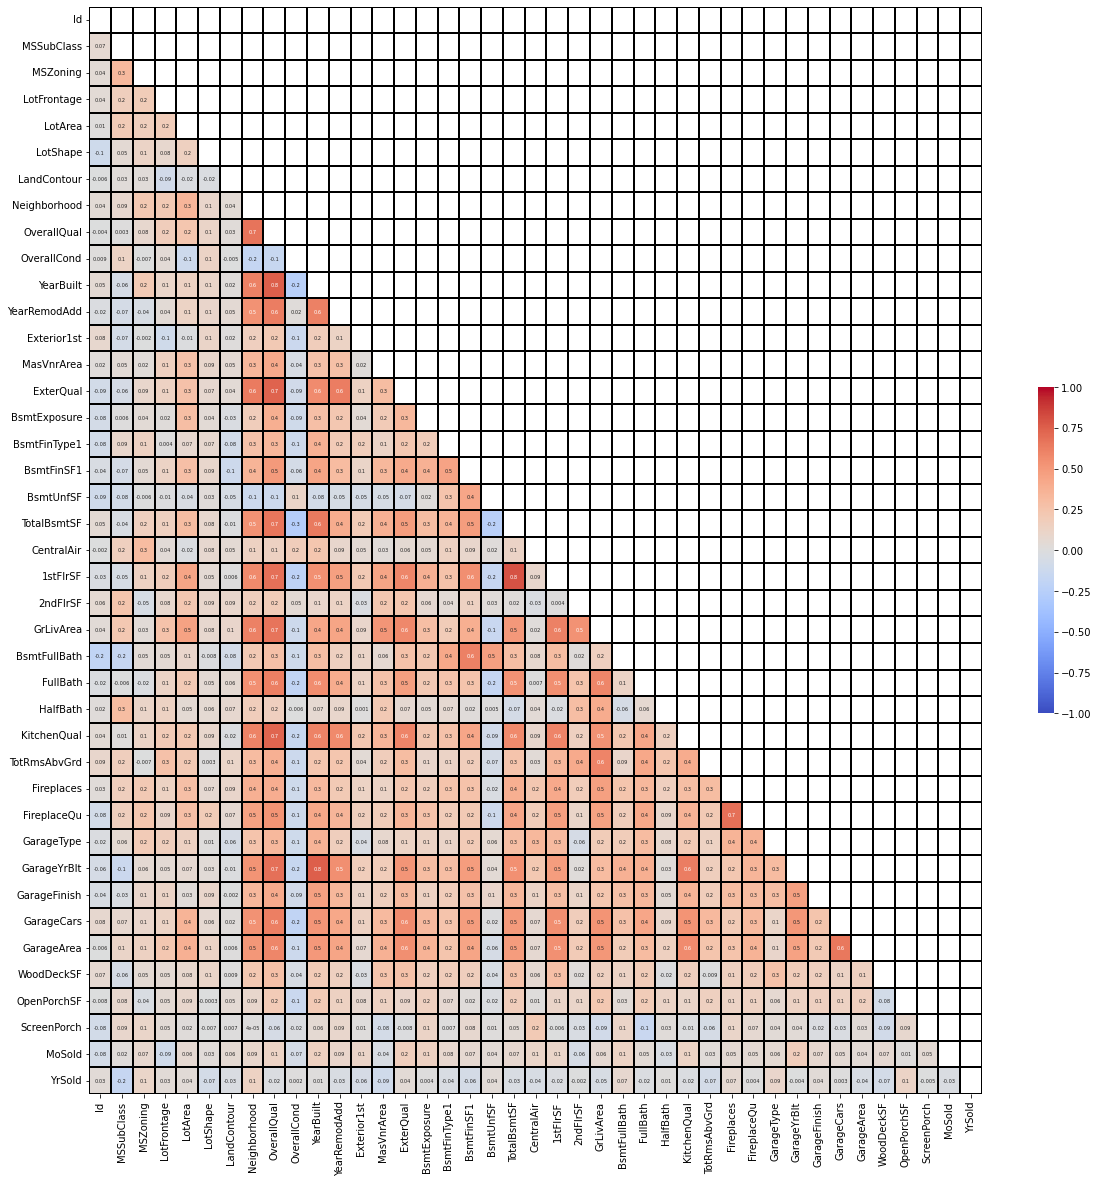

In [11]:
from featurePruner.secondary_utils import correlation_heatmap
corr = result["prediction_correlation"]
_ = correlation_heatmap(corr, figsize=(20,20), annot_kws={"fontsize": 5})

* Another utility function is the `n_largest_correlation` function which produces a DataFrame of the `n` largest correlation magnitudes in the prediction-space which is easier to view than a heatmap if you have many features:


In [12]:
from featurePruner.secondary_utils import n_largest_correlation
n_largest_correlation(corr, n=15)

,var1,var2,correlation
0,1stFlrSF,TotalBsmtSF,0.804254
1,GarageYrBlt,YearBuilt,0.756138
2,YearBuilt,OverallQual,0.754895
3,ExterQual,OverallQual,0.735058
4,KitchenQual,OverallQual,0.729798
5,GarageYrBlt,OverallQual,0.686760
6,1stFlrSF,OverallQual,0.683936
7,FireplaceQu,Fireplaces,0.683137
8,OverallQual,Neighborhood,0.670609
9,GrLivArea,OverallQual,0.666075


In [13]:
result["cluster_by_pruning_intensity"]

,clusterAtAggression3
Id,3.0
MSSubClass,2.0
MSZoning,3.0
LotFrontage,2.0
LotArea,4.0
LotShape,3.0
LandContour,3.0
Neighborhood,5.0
OverallQual,5.0
OverallCond,1.0


* `cluster_by_pruning_intensity` object is based off the `prediction_correlation` correlation matrix. 
* `pruner` forms clusters from the correlation matrix & uses it to help determine which variables to remove and which to keep at the specified pruning_intensity levels. 
* Use this function as a diagnostic tool if you are interested in knowing how `pruner` performs its variable recommendation process. We can see that `GarageArea` and `GarageCars` variables were part of the same cluster(=1.0) because their correlation in the prediction space(shown in the previous cells) is relatively large. 
* For more details on how these information are used to determine variable recommendations, please the FAQ.md file. 
<br>
<br>
* Lastly the fourth object is the model itself that was used to produce the previous 3 objects. This is just for the users analysis if required.

In [14]:
mod = result["model"]
mod.feature_name()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandContour',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'Exterior1st',
 'MasVnrArea',
 'ExterQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'MoSold',
 'YrSold']

## 6. Additional arguments for further control on `pruner` function:

`pruner` has many more arguments than those discussed above. Let's step through some of the useful ones. But remember, the documentation to the function itself can be seen easily by running
```python
?pruner
```
in jupyter notebook or IPython.

### 6a. Passing hyperparmeters
If the user has a known set of hyperparameters they'd like to use, then you can pass those in via the `params` argument. This argument values should be a dictionary with naming conventions and data types consistent with [LightGBM](https://lightgbm.readthedocs.io/en/latest/Parameters.html) standards. Let's pass in the parameters that were recommended in our previous run when we tuned for 40 trials:

In [15]:
params = {'learning_rate': 0.04, 
          'max_depth': 5, 
          'num_leaves': 999, 
          'reg_lambda': 3.053932133388915, 
          'bagging_fraction': 0.8594881640847141, 
          'bagging_freq': 1, 
          'reg_alpha': 6.850203452777174, 
          'cat_l2': 33.535220953939785, 
          'feature_fraction': 0.4, 
          'max_cat_threshold': 26, 
          'cat_smooth': 12.868317955588765,
          'min_gain_to_split': 12.995486772544686}

result = pruner(df=df, target_column="SalePrice", weight_column="weight", objective="rmse",
                     print_logs=False, pruning_intensity=3, auto_tune_missing_parameters=False, 
                     params=params)



result["pruningResults"]

,permutation_importance,gain_importance,percent_permutation_importance,percent_gain_importance,removeVariableAtIntensity3
OverallQual,8.082369e+08,3.393955e+13,0.304859,0.318208,False
GrLivArea,6.410683e+08,1.882790e+13,0.241805,0.176526,False
TotalBsmtSF,1.839142e+08,5.028865e+12,0.069371,0.047149,False
Neighborhood,1.818198e+08,3.703977e+12,0.068581,0.034728,False
GarageCars,1.128746e+08,1.103101e+13,0.042575,0.103424,False
KitchenQual,8.432956e+07,3.859815e+12,0.031808,0.036189,False
BsmtFinSF1,7.791733e+07,2.532736e+12,0.029390,0.023746,False
YearBuilt,7.435198e+07,1.859183e+12,0.028045,0.017431,False
1stFlrSF,6.573415e+07,2.671802e+12,0.024794,0.025050,False
GarageArea,6.372953e+07,5.322491e+12,0.024038,0.049902,False


* Note that  you don't need to pass all the hyperparameters. Now lets just pass in a few but set `auto_tune_missing_parameters=True` so we tune over the remaining missing parameters. We'll also turn `print_logs` back on so we can see what the hyperparameter tuning were finalised.

In [16]:
reduced_params = {'learning_rate': 0.04, 
          'max_depth': 5, 
          'num_leaves': 999, 
          'reg_lambda': 3.053932133388915, 
#           'bagging_fraction': 0.8594881640847141, 
          'bagging_freq': 1, 
#           'reg_alpha': 6.850203452777174, 
#           'cat_l2': 33.535220953939785, 
          'feature_fraction': 0.4, 
          'max_cat_threshold': 26, 
#           'cat_smooth': 12.868317955588765,
          'min_gain_to_split': 12.995486772544686}

results = pruner(df=df, target_column="SalePrice", weight_column="weight", objective="rmse",
                     print_logs=True, pruning_intensity=3, auto_tune_missing_parameters=True, 
                     params=reduced_params, random_tuning_runs=10, total_tuning_runs=40)
                  
results["pruningResults"]

These string valued columns are being converted to categorical :
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Removing 38 variables because they are not predictive according to Primary model results. These will not have any info. 
`autofillMissingParameters` is True so we are going to perform  hyperparameter tuning for 40 runs 

Hyperparameters finalised. These are the parameters used in   Secondary model:
{'learning_rate': 0.04, 'max_depth': 5, 'num_leaves': 

Pruning complete. Result is a dictionary. TO look at results, check the check the 'results' key which has a dataframe as value with all the results. 



,permutation_importance,gain_importance,percent_permutation_importance,percent_gain_importance,removeVariableAtIntensity3
OverallQual,6.674658e+08,2.785536e+13,0.269229,0.278575,False
GrLivArea,5.893588e+08,1.696124e+13,0.237724,0.169625,False
TotalBsmtSF,2.117872e+08,6.977135e+12,0.085426,0.069777,False
GarageCars,1.366293e+08,1.214306e+13,0.055111,0.121440,False
Neighborhood,1.109758e+08,1.635039e+12,0.044763,0.016352,False
BsmtFinSF1,1.006866e+08,2.677537e+12,0.040613,0.026777,False
KitchenQual,9.666090e+07,3.895797e+12,0.038989,0.038961,False
YearBuilt,6.235987e+07,1.590028e+12,0.025153,0.015901,False
LotArea,5.622557e+07,2.640283e+12,0.022679,0.026405,False
1stFlrSF,5.475437e+07,2.950726e+12,0.022086,0.029509,False


* The new recommended hyperparameters for `reg_alpha`, `bagging_fraction`, `cat_l2`, and `cat_smooth` are a little different but remember that hyperparameter tuninig is stochastic itself and also these were tuned while all the others were fixed.
* For a more consistent hyperparameter values, set the `total_tuning_runs` argument to higher values if you dataset is small & you will get a more generalised values.

### 6b. Monitoring hyperprameter tuning
You can watch the results from hyperparameter tuning as they happen by setting `print_tuning_results` to `True` :

In [17]:
results = pruner(df=df, target_column="SalePrice", weight_column="weight", objective="rmse",
                     print_logs=False, pruning_intensity=3, auto_tune_missing_parameters=True, 
                     random_tuning_runs=2, total_tuning_runs=4, print_tuning_results=True)

[I 2022-03-23 13:58:33,153] Finished trial#0 resulted in value: 22816.533268439787. Current best value is 22816.533268439787 with parameters: {'min_gain_to_split': 9.363502971184062, 'reg_lambda': 47.68357240126606, 'reg_alpha': 22.09382128343645, 'bagging_fraction': 0.6993292420985183, 'max_depth': 8, 'max_cat_threshold': 23, 'cat_l2': 4.899021716902112, 'cat_smooth': 13.103475623249077}.
[I 2022-03-23 13:58:33,691] Finished trial#1 resulted in value: 23161.68448222641. Current best value is 22816.533268439787 with parameters: {'min_gain_to_split': 9.363502971184062, 'reg_lambda': 47.68357240126606, 'reg_alpha': 22.09382128343645, 'bagging_fraction': 0.6993292420985183, 'max_depth': 8, 'max_cat_threshold': 23, 'cat_l2': 4.899021716902112, 'cat_smooth': 13.103475623249077}.
[I 2022-03-23 13:58:34,560] Finished trial#2 resulted in value: 22662.124000695807. Current best value is 22662.124000695807 with parameters: {'min_gain_to_split': 20.954531299832993, 'reg_lambda': 49.85166194465872

### 6c. Number of permutation runs

As mentioned earlier we randomly permute each variable one-by-one to get permutation importance along with the correlation matrix in prediction space. Both of these are inputs to the heuristics that determine whether to remove or keep a variable. Since permutations represent a stochastic process, and if we want to reduce the volatility, we can increase the `permutation_rounds` argument. The default is 1 which means permute the data only once. Lets increase this to 10 so that a variable is permuted 10 times

In [18]:
results = pruner(df=df, target_column="SalePrice", weight_column="weight", objective="rmse",
                     print_logs=False, pruning_intensity=3, permutation_rounds=10)

results["pruningResults"]

,permutation_importance,gain_importance,percent_permutation_importance,percent_gain_importance,removeVariableAtIntensity3
OverallQual,7.509571e+08,2.759573e+13,0.304907,0.291610,False
GrLivArea,4.255541e+08,1.255459e+13,0.172785,0.132667,False
Neighborhood,1.824781e+08,4.681396e+12,0.074091,0.049469,False
TotalBsmtSF,1.717271e+08,5.705064e+12,0.069725,0.060287,False
BsmtFinSF1,1.218662e+08,3.103706e+12,0.049481,0.032798,False
1stFlrSF,1.118375e+08,3.048471e+12,0.045409,0.032214,False
GarageCars,9.896362e+07,7.062432e+12,0.040182,0.074630,False
YearBuilt,9.696650e+07,3.796907e+12,0.039371,0.040123,False
LotArea,8.041559e+07,2.473968e+12,0.032651,0.026143,False
GarageArea,6.541617e+07,5.939347e+12,0.026561,0.062762,False


### 6d. Using alternative correlation measures:

* The default correlation method is pearson's correlation coefficient to compute the prediction correlation matrix. 
* `pruner` also supports the rank correlation statistics like Kendall's Tau and Spearman's Rho. 
* Note that using these correlation methods can be a lot slower compared to Pearson's , especially for large datasets. 

In [19]:
## Using `kendall` correlation method
results = pruner(df=df, target_column="SalePrice", weight_column="weight", objective="rmse",
                     print_logs=False, pruning_intensity=3, correlation_method="kendall")

results["pruningResults"]

,permutation_importance,gain_importance,percent_permutation_importance,percent_gain_importance,removeVariableAtIntensity3
OverallQual,7.545866e+08,2.759573e+13,0.300902,0.291610,False
GrLivArea,4.469648e+08,1.255459e+13,0.178234,0.132667,False
TotalBsmtSF,1.837575e+08,5.705064e+12,0.073276,0.060287,False
Neighborhood,1.724027e+08,4.681396e+12,0.068748,0.049469,False
BsmtFinSF1,1.226983e+08,3.103706e+12,0.048928,0.032798,False
1stFlrSF,1.151829e+08,3.048471e+12,0.045931,0.032214,False
YearBuilt,1.018120e+08,3.796907e+12,0.040599,0.040123,False
GarageCars,9.392122e+07,7.062432e+12,0.037452,0.074630,False
KitchenQual,7.309667e+07,2.195584e+12,0.029148,0.023201,False
GarageArea,6.688904e+07,5.939347e+12,0.026673,0.062762,False


In [20]:
## Using `spearman` correlation method
results = pruner(df=df, target_column="SalePrice", weight_column="weight", objective="rmse",
                     print_logs=False, pruning_intensity=3, correlation_method="spearman")

results["pruningResults"]

,permutation_importance,gain_importance,percent_permutation_importance,percent_gain_importance,removeVariableAtIntensity3
OverallQual,7.545866e+08,2.759573e+13,0.300902,0.291610,False
GrLivArea,4.469648e+08,1.255459e+13,0.178234,0.132667,False
TotalBsmtSF,1.837575e+08,5.705064e+12,0.073276,0.060287,False
Neighborhood,1.724027e+08,4.681396e+12,0.068748,0.049469,False
BsmtFinSF1,1.226983e+08,3.103706e+12,0.048928,0.032798,False
1stFlrSF,1.151829e+08,3.048471e+12,0.045931,0.032214,False
YearBuilt,1.018120e+08,3.796907e+12,0.040599,0.040123,False
GarageCars,9.392122e+07,7.062432e+12,0.037452,0.074630,False
KitchenQual,7.309667e+07,2.195584e+12,0.029148,0.023201,False
GarageArea,6.688904e+07,5.939347e+12,0.026673,0.062762,False


Looking at the above results, we see that `correlation_method` doesnt impact the importances at all. It only impacts the `removeVariableAtIntensity[1-5]` columns since things change slightly between Pearson's and the rank correlation statistics

### 6e. Alternative Permutation Importance Metric
The metric used for permutation importance is selected for us if the user doesnt explicitly pass it as an argument. 
But if the user wanted a different metric (the metric used in all the examples thus far is rmse), we have two options:  
1.) Set the metric as one of ("norm_gini", "rmse", "mae", "tweedie_deviance", "poisson_deviance",
"gamma_deviance", "cross_entropy", "accuracy", and "fbeta") or  
2.) Pass a function that has a signature like so:  
```python
def custom_metric(predictions, actuals, weights):
    ...
    ...
    return metric
```

Let's use another metrics first - mae. As you can see from results below, depending on your metric & type fo problem you are modelling, you will get different results.

In [22]:
results = pruner(df=df, target_column="SalePrice", weight_column="weight", objective="rmse",
                     print_logs=False, pruning_intensity=3, metric="mae")

results["pruningResults"]

,permutation_importance,gain_importance,percent_permutation_importance,percent_gain_importance,removeVariableAtIntensity3
OverallQual,9718.131737,2.759573e+13,0.275169,0.291610,False
GrLivArea,6297.575888,1.255459e+13,0.178316,0.132667,False
TotalBsmtSF,2626.173796,5.705064e+12,0.074360,0.060287,False
YearBuilt,2373.437896,3.796907e+12,0.067204,0.040123,False
Neighborhood,2267.906752,4.681396e+12,0.064216,0.049469,False
BsmtFinSF1,1584.538646,3.103706e+12,0.044866,0.032798,False
OverallCond,1250.267362,5.483826e+11,0.035401,0.005795,False
1stFlrSF,1240.772616,3.048471e+12,0.035132,0.032214,False
LotArea,1131.742467,2.473968e+12,0.032045,0.026143,False
GarageCars,970.577392,7.062432e+12,0.027482,0.074630,False


Now users may want a more flexible metric than is offered in standard in this package. 
Lets say we wanted to compute explained_variance_score with `multioutput=variance_weighted`. To do this we write a custom function for this metric & pass it to `pruner` via the `metric` argument as shown below:

In [24]:
from sklearn.metrics import explained_variance_score

def custom_variance_weighted(preds, actuals, weights):
    return explained_variance_score(actuals, preds, multioutput='uniform_average')

In [25]:
results = pruner(df=df, target_column="SalePrice", weight_column="weight", objective="rmse",
                     print_logs=False, pruning_intensity=3, metric=custom_variance_weighted)

results["pruningResults"]

,permutation_importance,gain_importance,percent_permutation_importance,percent_gain_importance,removeVariableAtIntensity3
LotFrontage,0.000756,7.804058e+11,0.297393,0.008247,False
MasVnrArea,0.000709,7.593857e+11,0.278801,0.008025,False
LandSlope,0.000450,7.068100e+10,0.176881,0.000747,False
Exterior1st,0.000374,5.665691e+10,0.147106,0.000599,False
LotShape,0.000254,1.752394e+11,0.099818,0.001852,False
MSSubClass,-0.000050,3.169456e+11,-0.019827,0.003349,True
GarageQual,-0.000074,7.706409e+10,-0.029016,0.000814,True
WoodDeckSF,-0.000143,3.316495e+11,-0.056311,0.003505,True
BsmtUnfSF,-0.000168,3.573514e+11,-0.065912,0.003776,True
MasVnrType,-0.000240,1.053976e+11,-0.094507,0.001114,True


* Again very different set of results depending on the metric of your choosing

## For more information have a read at the FAQ.md file 